# Assignment 02

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Machine Learning
- Course ID: BDA500NAA.05380.2237
- Professor: Dr. Amir Moslemi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from sklearn.decomposition import PCA


## Task 1

### Objectives
- Get familiar with the Support Vector Machine, regularization, and hyperparameter optimization.  
- Further understand training, tuning, evaluation, and prediction, in Machine Learning Projects. 


### Data
- Use the Iris dataset from Sklearn. 
- This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

### Data Clearning & Observations

In [3]:
# load data
iris = datasets.load_iris()

# create feature matrix and target value
X = iris['data']
y = iris['target']

# create function to modify the target 
f = np.vectorize({i: name for i, name in enumerate(iris['target_names'])}.get)
# create the dataframe
df = pd.DataFrame(np.c_[X, f(y)], columns=iris['feature_names']+['target'])
# change the dtype of features to float
df = df.astype({feature: float for feature in iris['feature_names']})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# check number of each category in target value 
df['target'].value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
# meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# brief statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\runru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


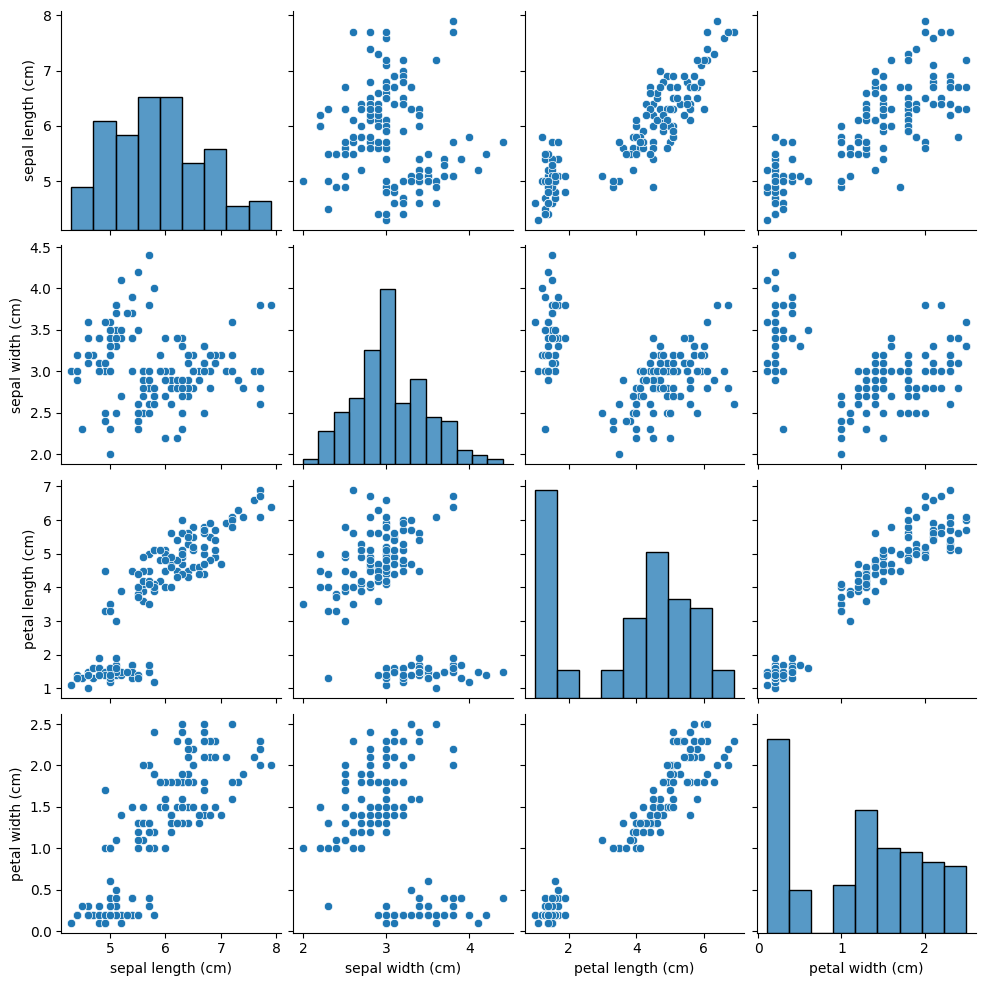

In [7]:
# pair plot
sns.pairplot(df.iloc[:, :4])

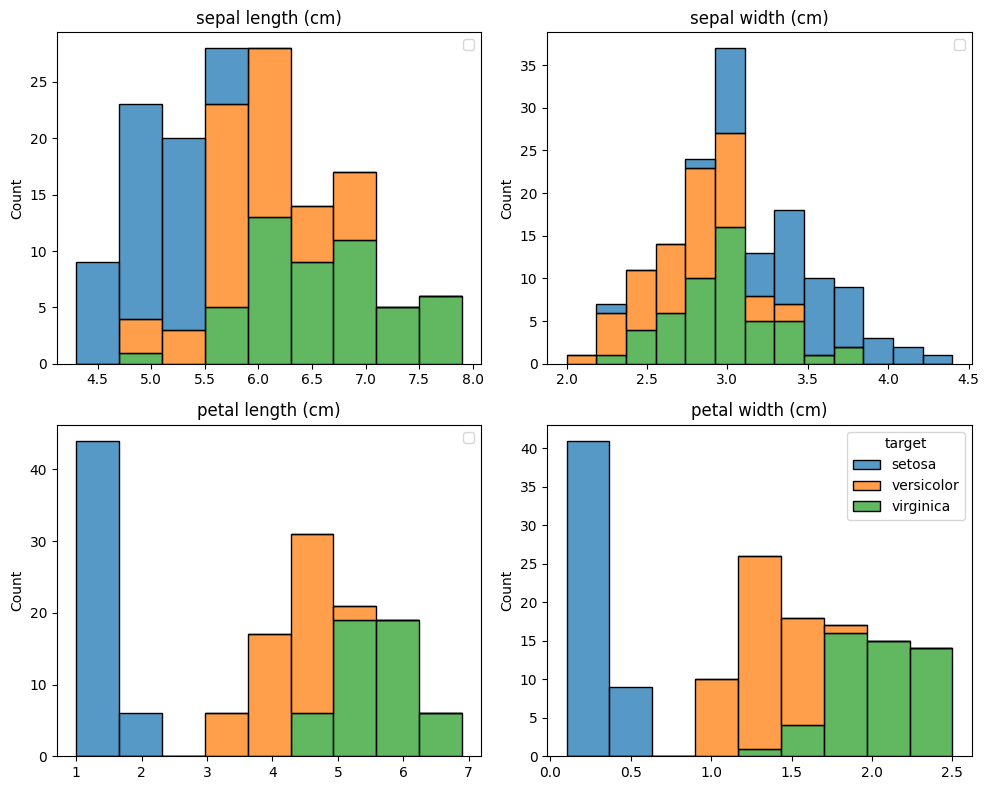

In [8]:
# histogram of each feature conditioned by target value

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i, feature in enumerate(iris['feature_names']):
    r, c = i // 2, i % 2
    # create a histogram
    sns.histplot(data=df, x=feature, hue='target', multiple='stack', ax=ax[r][c])
    # title
    ax[r][c].set_title(feature)
    # x labels off
    ax[r][c].set_xlabel('')
    # legend off
    if i < 3:
        ax[r][c].legend('')
 
plt.tight_layout()
plt.show()


In [9]:
# standardization
scaler = StandardScaler()
X_ss = scaler.fit_transform(X, y)

# show basic statistics
pd.DataFrame(X_ss, columns=iris['feature_names']).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [26]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X_ss[:, 2:], y, test_size=0.3, random_state=0)

print("Train:")
print("X:", X_train.shape, "y:", y_train.shape)
print('')
print("Test:")
print("X:", X_test.shape, "y:", y_test.shape)

Train:
X: (105, 2) y: (105,)

Test:
X: (45, 2) y: (45,)


### Models Creation

- LinearSVC


- SVC, set hyperparameter kernel as “linear” , 
refer to: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


- SGDClassifier, apply the parameter: loss=”hinge”, try the rest parameters by yourself. Refer to: https://scikit- learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


- SVC, set hyperparameters kernel as “rbf”, random_state as zero. No other parameter settings.


- SVC, use RandomizedSearchCV() to optimize the hyperparameters. 

#### Functions for the model evaluation

In [123]:
def metrics_from_cm(cm, target_classes):
    tp = np.diag(cm)  # True Positive
    fp = np.sum(cm, axis=0) - tp  # False Positive
    fn = np.sum(cm, axis=1) - tp  # False Negative
    tn = np.sum(cm) - tp - fp - fn  # True Negative
    #num_classes = cm.shape[0]  # class number
    
    #calculate the metrics
    acc = (tp + tn) / np.sum(cm)  # accuracy
    prec = tp / (tp + fp)  # precision
    rec = tp / (tp + fn)  # recall
    f1 = 2 * prec * rec / (prec + rec)  # f1 score

    # create the metrics dataframe
    met_df = pd.DataFrame({'accuracy': acc, 'precision': prec, 'recall': rec, 'f1 score': f1}, 
                          index=target_classes)
    met_df.index.name = 'target'
    met_df_melt = pd.melt(met_df.reset_index(), id_vars='target', var_name='metric', value_name='value')

    
    #return the metrics as a dictionary
    return met_df, met_df_melt

In [124]:
def model_evaluation(model_name, model, X_act, y_act, y_hat):
    # generate confusion matrix
    cm = confusion_matrix(y_act, y_hat)
    print(f"Confusion Matrix: \n{cm}")

    # calculate accuracy, precision, recall, fi score for each class
    met_df, met_df_melt = metrics_from_cm(cm, iris['target_names'])
    print(f'\nMetrics: \n{met_df}')
  
    # get y_score for ROC an AUC
    y_score = model.decision_function(X_act)

    fpr = dict()  # False Positive Rate
    tpr = dict()  # True Positive Rate
    roc_auc = dict()  # Area Under CUrve of ROC

    # Calculate the FPR, TPR, and AUC for each class
    for i in range(3):
        y_binary = np.where(y_act == i, 1, 0)
        fpr[i], tpr[i], _ = roc_curve(y_binary, y_score[:, i])
        roc_auc[i] = roc_auc_score(y_binary, y_score[:, i])

    # setting a figure sheet
    plt.ioff()
    fig, ax = plt.subplots(1, 3, figsize=(14, 4))

    # scatter plot with decision boundary
    colors_lst = ['blue', 'orange', 'green']
    target_names = ['setosa', 'versicolor', 'virginica']
    custom_cmap = colors.ListedColormap(colors_lst)
    # function to convert integer to string
    y_func = np.vectorize({i: name for i, name in enumerate(target_names)}.get)
    sns.scatterplot(x=X_act[:, 0], y=X_act[:, 1], ax=ax[0], 
                    hue=y_func(y_act), 
                    palette={n: c for n, c in zip(target_names, colors_lst)})
    ax[0].set_title('Decision boundary')
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X_act, cmap=custom_cmap, response_method='predict', alpha=0.2, ax=ax[0]
        )
    

    # ROC curve for each class
    for i in range(3):
        ax[1].plot(fpr[i], tpr[i], label=f'"{target_names[i]}" (AUC:{roc_auc[i]:.2f})')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC ({model_name})')
    ax[1].legend()

    # all metrics from the confusion matrix
    sns.lineplot(data=met_df_melt, x='metric', y='value', hue='target', ax=ax[2])
    ax[2].set_title('Comparing Metrics')
    
    plt.close()

    return fig

#### LinearSVC

Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]

Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.955556   0.944444  0.944444  0.944444
virginica   0.955556   0.909091  0.909091  0.909091


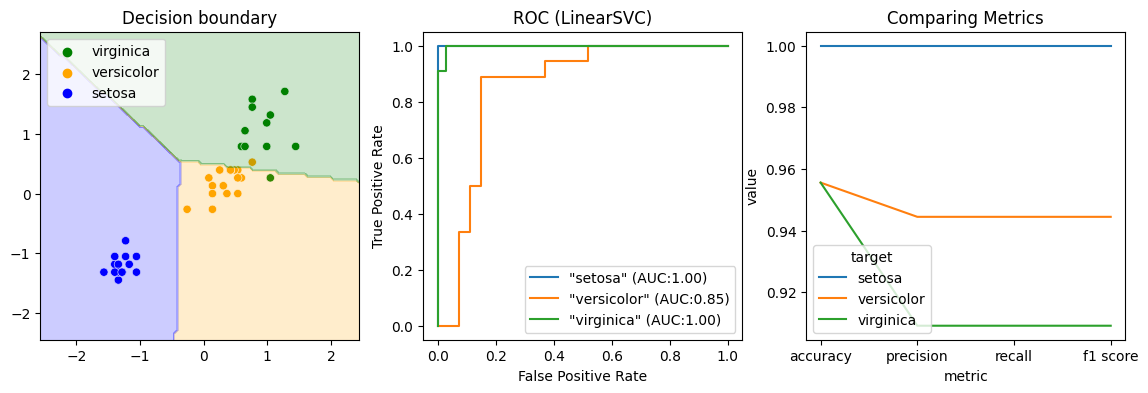

In [219]:
lr_svc = LinearSVC(dual='auto', random_state=0)
lr_svc.fit(X_train, y_train)
y_hat_1 = lr_svc.predict(X_test)

fig = model_evaluation('LinearSVC', lr_svc, X_test, y_test, y_hat_1)
fig

#### SVC(kernal="linear")

Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]

Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.955556   0.944444  0.944444  0.944444
virginica   0.955556   0.909091  0.909091  0.909091


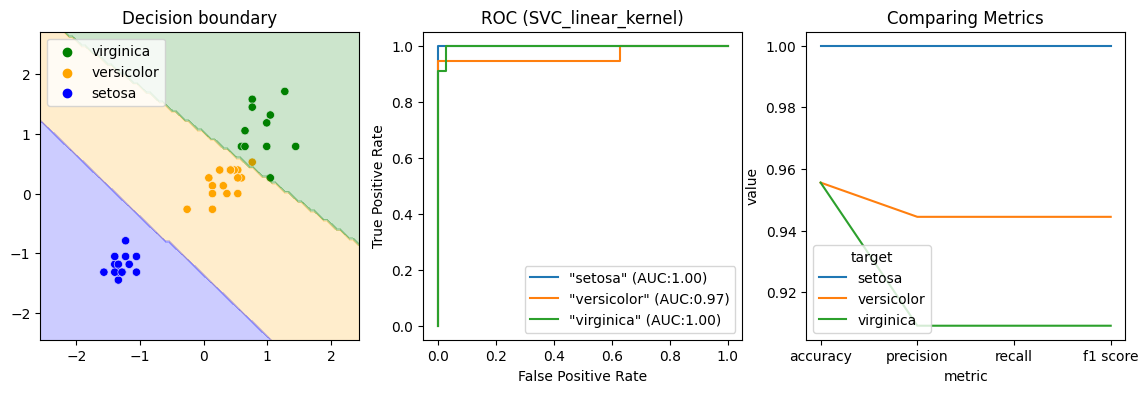

In [220]:
svc_linear = SVC(kernel='linear', random_state=0)
svc_linear.fit(X_train, y_train)
y_hat_2 = lr_svc.predict(X_test)

fig = model_evaluation('SVC_linear_kernel', svc_linear, X_test, y_test, y_hat_2)
fig

#### SGDClassifier

Best parameters: SGDClassifier(alpha=0.001, penalty='l1', random_state=0)

Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.977778   1.000000  0.944444  0.971429
virginica   0.977778   0.916667  1.000000  0.956522


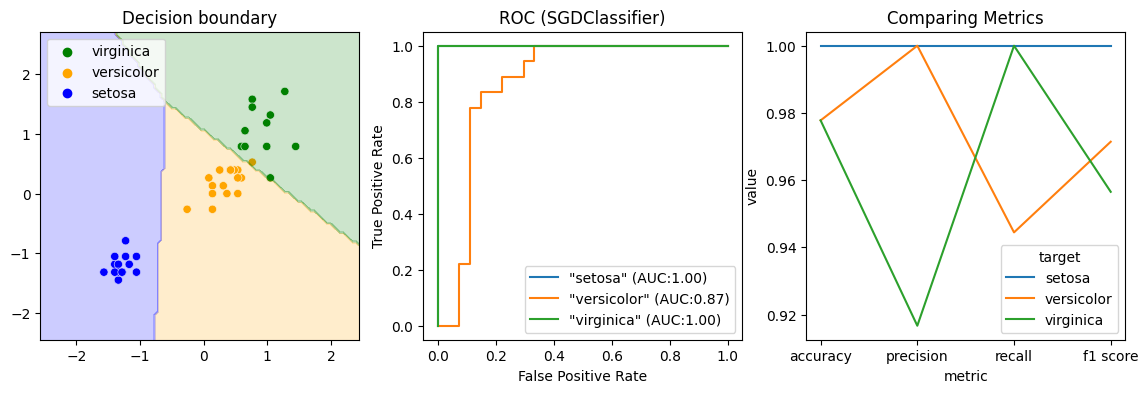

In [238]:
parameters = {'penalty': ('l1', 'l2', 'elasticnet'), 
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
             }
sgdc_grid = GridSearchCV(SGDClassifier(loss='hinge', random_state=0), parameters, cv=5)
sgdc_grid.fit(X_ss[:, 2:], y)
# get the best hyperparameter
best_params = sgdc_grid.best_estimator_
print(f"Best parameters: {best_params}\n")

# train the training data
sgdc = SGDClassifier(loss='hinge', penalty=best_params.penalty, alpha=best_params.alpha, random_state=0)
sgdc.fit(X_train, y_train)
y_hat_3 = sgdc.predict(X_test)

fig = model_evaluation('SGDClassifier', sgdc, X_test, y_test, y_hat_3)
fig

#### SVC (kernal='rbf')

Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.977778   1.000000  0.944444  0.971429
virginica   0.977778   0.916667  1.000000  0.956522


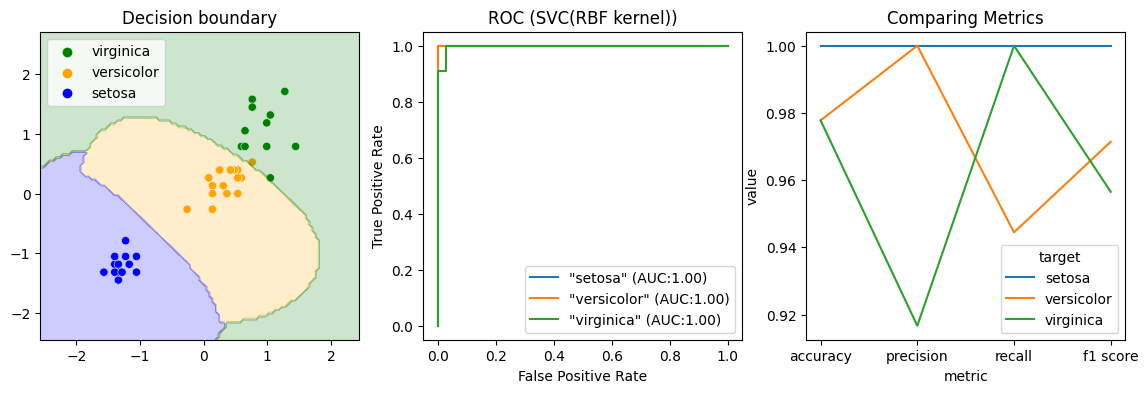

In [222]:
svc_rbf = SVC(kernel='rbf', random_state=0)
svc_rbf.fit(X_train, y_train)
y_hat_4 = svc_rbf.predict(X_test)

fig = model_evaluation('SVC(RBF kernel)', svc_rbf, X_test, y_test, y_hat_4)
fig

#### SVC (random hyperparameters)

Best parameters: SVC(C=0.6896551724137931, gamma=0.9689655172413792, kernel='poly',
    random_state=0)

Confusion Matrix: 
[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]

Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.977778   0.947368  1.000000  0.972973
virginica   0.977778   1.000000  0.909091  0.952381


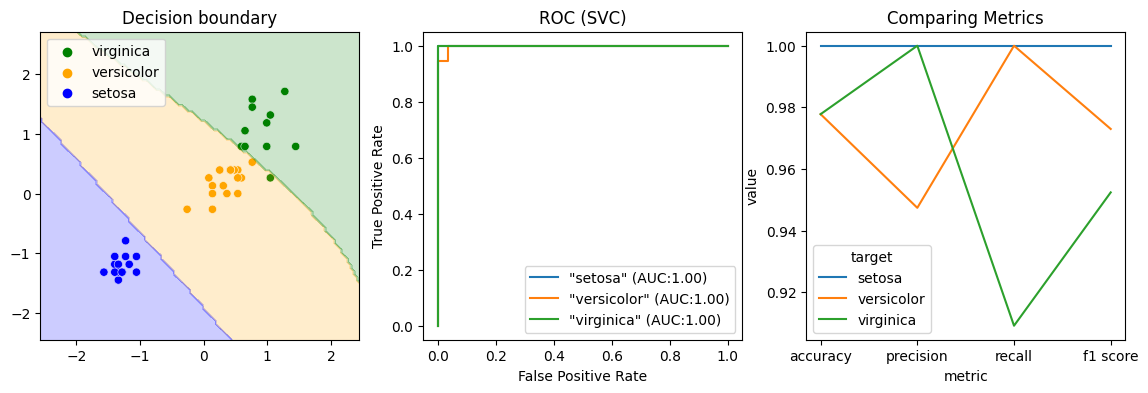

In [245]:
# define parameters
parameters = {
    'C': np.linspace(0, 10, 30),
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'gamma': np.linspace(0.1, 1, 30)
    }
search = RandomizedSearchCV(SVC(random_state=0), parameters, n_iter=10, cv=5)
search.fit(X_ss[:, 2:], y)
best_params = search.best_estimator_
print(f"Best parameters: {best_params}\n")

svc = SVC(C=best_params.C, kernel=best_params.kernel, gamma=best_params.gamma, random_state=0)
svc.fit(X_train, y_train)
y_hat_5 = svc.predict(X_test)

fig = model_evaluation('SVC', svc, X_test, y_test, y_hat_5)
fig

## Task 2

In [2]:
from sklearn.decomposition import PCA

In [34]:
# use the same feature matrix and target vector as task1
print("Feature matrix:")
print(X_ss[:5])

Feature matrix:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


[0.72962445 0.22850762 0.03668922 0.00517871]


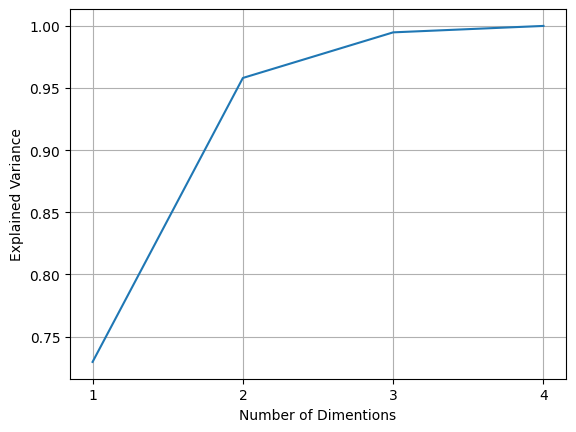

In [86]:
# (1) & (2): Apply PCA with 95% of explained variance ratio.

pca = PCA()
pca.fit(X_ss)
# get the explained variance rario
ratios = pca.explained_variance_ratio_
print(ratios)
# plot the cumulative of these ratios
plt.plot([str(i) for i in range(1, len(ratios)+1)], np.cumsum(ratios))
plt.xlabel('Number of Dimentions')
plt.ylabel('Explained Variance')
plt.grid()

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import time

In [133]:
# (3)&(4): apply reduced features to the following three models 

# get the reduced X from the initial model
X_reduced = pca.fit_transform(X_ss)
# train/test split
X_train_4d, X_test_4d, y_train_4d, y_test_4d = train_test_split(X_reduced, y, test_size=.3, random_state=0)

# train three model based on the reduced dataset and recording time
# Logistic Regression
start1 = time.time()
lr_reg_4d = LogisticRegression()
lr_reg_4d.fit(X_train_4d, y_train_4d)
end1 = time.time()
score1 = lr_reg_4d.score(X_test_4d, y_test_4d)
print(f'Logistics Regression: \n Time: {end1-start1}, Score: {score1}')
# Tree
start2 = time.time()
tree_4d = DecisionTreeClassifier()
tree_4d.fit(X_train_4d, y_train_4d)
end2 = time.time()
score2 = tree_4d.score(X_test_4d, y_test_4d)
print(f'Decision Tree: \n Time: {end2-start2}, Score: {score2}')
# SVC
start3 = time.time()
svc_4d = SVC(kernel='rbf')
svc_4d.fit(X_train_4d, y_train)
end3 = time.time()
score3 = svc_4d.score(X_test_4d, y_test_4d)
print(f'Support Vector Classification: \n Time: {end3-start3}. Score: {score3}')

Logistics Regression: 
 Time: 0.006017446517944336, Score: 0.9777777777777777
Decision Tree: 
 Time: 0.0020112991333007812, Score: 0.8222222222222222
Support Vector Classification: 
 Time: 0.004004955291748047. Score: 0.9777777777777777


In [92]:
# (5)&(6): Reducing features to two dimensions

pca_2d = PCA(n_components=2)
X_reduced_2D = pca_2d.fit_transform(X_ss)
pca_2d.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [134]:
# (7)&(8): Applying the reduced 2D feature matrix to the three models

# train/test split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_reduced_2D, y, test_size=.3, random_state=0)

# train three model based on the reduced dataset and recording time
# Logistic Regression
start1 = time.time()
lr_reg_2d = LogisticRegression()
lr_reg_2d.fit(X_train_2d, y_train_2d)
end1 = time.time()
score1 = lr_reg_2d.score(X_test_2d, y_test_2d)
print(f'Logistics Regression: \n Time: {end1-start1}, Score: {score1}')
# Tree
start2 = time.time()
tree_2d = DecisionTreeClassifier()
tree_2d.fit(X_train_2d, y_train_2d)
end2 = time.time()
score2 = tree_2d.score(X_test_2d, y_test_2d)
print(f'Decision Tree: \n Time: {end2-start2}, Score: {score2}')
# SVC
start3 = time.time()
svc_2d = SVC(kernel='rbf')
svc_2d.fit(X_train_2d, y_train_2d)
end3 = time.time()
score3 = svc_2d.score(X_test_2d, y_test_2d)
print(f'Support Vector Classification: \n Time: {end3-start3}. Score: {score3}')

Logistics Regression: 
 Time: 0.0030138492584228516, Score: 0.8666666666666667
Decision Tree: 
 Time: 0.0010039806365966797, Score: 0.8666666666666667
Support Vector Classification: 
 Time: 0.0009961128234863281. Score: 0.9333333333333333


Text(0.5, 1.0, 'Principal Component Analysis of Iris Dataset')

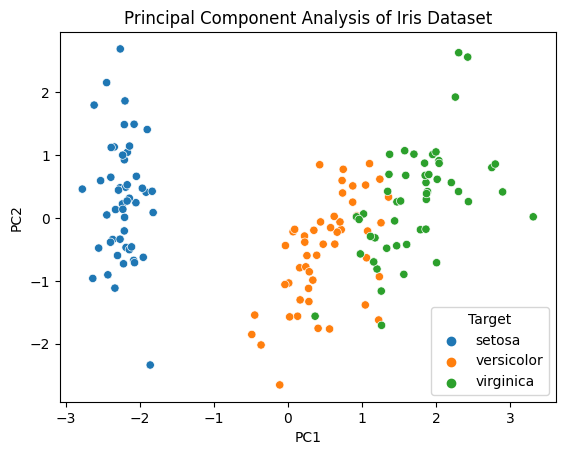

In [117]:
# (9): visualize the dataset

# create the dataframe of the 2D feature
X_2d_df = pd.DataFrame({
    "PC1": X_reduced_2D[:, 0],
    "PC2": X_reduced_2D[:, 1],
    "Target": df['target'].values
})

sns.scatterplot(data=X_2d_df, x='PC1', y='PC2', hue='Target')
plt.title('Principal Component Analysis of Iris Dataset')

In [138]:
# (10)~(14)-1: Comparing three models from the 4d feature matrix after PCA

models_4d = {"Logistic": lr_reg_4d, "Decision Tree": tree_4d, "SVC": svc_4d}
y_hats_4d = [m.predict(X_test_4d) for m in models_4d.values()]
    
for name, y_hat in zip(models_4d.keys(), y_hats_4d):
    print("Model:", name)
    cm = confusion_matrix(y_test_4d, y_hat)
    #print(f"Confusion Matrix: \n{cm}\n")

    # calculate accuracy, precision, recall, fi score for each class
    met_df, met_df_melt = metrics_from_cm(cm, iris['target_names'])
    print(f'\nMetrics: \n{met_df}\n')

Model: Logistic

Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.977778   1.000000  0.944444  0.971429
virginica   0.977778   0.916667  1.000000  0.956522

Model: Decision Tree

Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.822222   0.812500  0.722222  0.764706
virginica   0.822222   0.615385  0.727273  0.666667

Model: SVC

Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.977778   1.000000  0.944444  0.971429
virginica   0.977778   0.916667  1.000000  0.956522



In [140]:
# (10)~(14)-2: Comparing two models from the 2d feature matrix after PCA

models_2d = {"Logistic": lr_reg_2d, "SVC": svc_2d}
y_hats_2d = [m.predict(X_test_2d) for m in models_2d.values()]
    
for name, y_hat in zip(models_2d.keys(), y_hats_2d):
    print("Model:", name)
    cm = confusion_matrix(y_test_2d, y_hat)
    print(f"Confusion Matrix: \n{cm}\n")

    # calculate accuracy, precision, recall, fi score for each class
    met_df, met_df_melt = metrics_from_cm(cm, iris['target_names'])
    print(f'\nMetrics: \n{met_df}\n')

Model: Logistic
Confusion Matrix: 
[[16  0  0]
 [ 0 14  4]
 [ 0  2  9]]


Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.866667   0.875000  0.777778  0.823529
virginica   0.866667   0.692308  0.818182  0.750000

Model: SVC
Confusion Matrix: 
[[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]


Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.933333   1.000000  0.833333  0.909091
virginica   0.933333   0.785714  1.000000  0.880000



In [144]:
# (10)~(14)-3: Showing the predicted classes

# trained 4d feature matrix
print('From 4D feature')
print(svc_4d.predict(X_test_4d))
print('')
# trained 2d feature matrix
print('From 2D feature')
print(svc_2d.predict(X_test_2d))

From 4D feature
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]

From 2D feature
[2 1 0 2 0 2 0 1 2 1 2 1 1 2 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


Confusion Matrix: 
[[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]

Metrics: 
            accuracy  precision    recall  f1 score
target                                             
setosa      1.000000   1.000000  1.000000  1.000000
versicolor  0.933333   1.000000  0.833333  0.909091
virginica   0.933333   0.785714  1.000000  0.880000


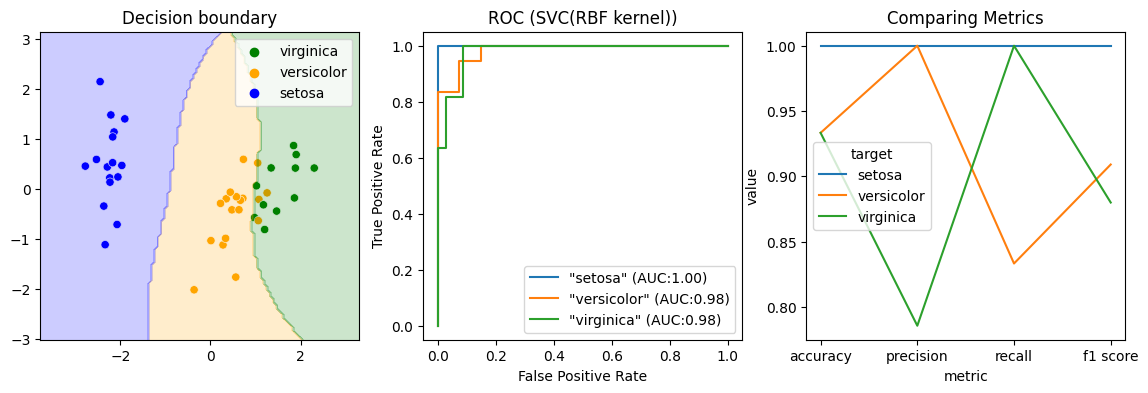

In [145]:
# (10)~(14)-3: Showing the predicted classes and ROC

model_evaluation('SVC(RBF kernel)', svc_2d, X_test_2d, y_test_2d, svc_2d.predict(X_test_2d))